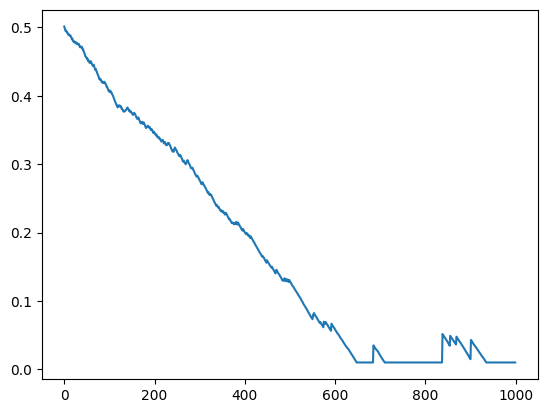

In [2]:
# One-Period Prisioners Dilemma
import numpy as np
import matplotlib.pyplot as plt
theta = np.array([0.5]) # P(C)
alpha = 0.001
eps = 1e-2
n_episodes = 30
n_iterations = 1000

def policy(theta,action):
    if action == 0:
        return 1 - theta
    else:
        return theta

def dpolicy(theta, action):
    if action == 0:
        return -1
    else:
        return 1
        
payoffs = np.array([[0, 2], 
                    [-1, 1.5]])
thetas = []
avg_returns = []
for iter in range(n_iterations):
    avg_return = 0
    action = np.random.choice([0,1],p=[1-theta.item(),theta.item()])
    for episode in range(n_episodes):
        oppn_action = np.random.choice([0,1])
        reward = payoffs[action,oppn_action]
        avg_return += reward/n_episodes
    theta = theta + alpha * avg_return * dpolicy(theta, action) / policy(theta,action)
    theta = np.clip(theta, eps, 1-eps)
    thetas.append(theta.item())
plt.plot(thetas)

In [64]:
# Infinite Horizon Prisioners Dilemma
# Facing Tit-for-Tat
import numpy as np
import matplotlib.pyplot as plt
theta = np.array([0.5, 0.5]) # P(C)
alpha = 0.001
eps = 1e-2
episode_length = 30
n_iterations = 10

def policy(theta,action):
    if action == 0:
        return 1 - theta
    else:
        return theta

def dpolicy(theta, action):
    if action == 0:
        return -1
    else:
        return 1
        
payoffs = np.array([[0, 2], 
                    [-1, 1.5]])
theta0s = []
theta1s = []
avg_returns = []

In [65]:
for iter in range(n_iterations):
    state = np.random.choice([0,1])
    states = [state]
    actions = []
    rewards = []
    oppn_state = np.random.choice([0,1])
    for t in range(episode_length):
        action = np.random.choice([0,1],p=[1-theta[state].item(),theta[state].item()])
        oppn_action = oppn_state
        reward = payoffs[action,oppn_action]
        rewards.append(reward)
        states.append(state)
        actions.append(action)
        
    avg_return = 0
    for t in range(episode_length,-1,-1):
        print(t)
        state = states[t-2]
        action = actions[t-1]
        reward = rewards[t-1]
        avg_return += reward
        theta[state] = theta[state] + alpha * avg_return * dpolicy(theta[state], action) / policy(theta[state],action)
    avg_returns.append(avg_return)
    theta = np.clip(theta, eps, 1-eps)
    print(theta, avg_returns)
    theta0s.append(theta[0])
    theta1s.append(theta[1])

30
29
28
27
26
25
24
23
22
21
20
19
18
17
16
15
14
13
12
11
10
9
8
7
6
5
4
3
2
1
0
[0.42282861 0.5       ] [-17.0]
30
29
28
27
26
25
24
23
22
21
20
19
18
17
16
15
14
13
12
11
10
9
8
7
6
5
4
3
2
1
0
[0.42282861 0.01      ] [-17.0, 53.5]
30
29
28
27
26
25
24
23
22
21
20
19
18
17
16
15
14
13
12
11
10
9
8
7
6
5
4
3
2
1
0
[0.42282861 0.01      ] [-17.0, 53.5, 0.0]
30
29
28
27
26
25
24
23
22
21
20
19
18
17
16
15
14
13
12
11
10
9
8
7
6
5
4
3
2
1
0
[0.42282861 0.01      ] [-17.0, 53.5, 0.0, 62.0]
30
29
28
27
26
25
24
23
22
21
20
19
18
17
16
15
14
13
12
11
10
9
8
7
6
5
4
3
2
1
0
[0.42215707 0.01      ] [-17.0, 53.5, 0.0, 62.0, -13.0]
30
29
28
27
26
25
24
23
22
21
20
19
18
17
16
15
14
13
12
11
10
9
8
7
6
5
4
3
2
1
0
[0.42215707 0.01      ] [-17.0, 53.5, 0.0, 62.0, -13.0, -1.0]
30
29
28
27
26
25
24
23
22
21
20
19
18
17
16
15
14
13
12
11
10
9
8
7
6
5
4
3
2
1
0
[0.42215707 0.01      ] [-17.0, 53.5, 0.0, 62.0, -13.0, -1.0, 62.0]
30
29
28
27
26
25
24
23
22
21
20
19
18
17
16
15
14
13
12
11
10
9
8
7
6


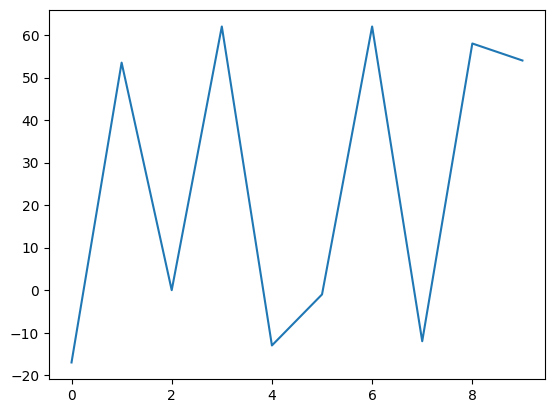

In [66]:
plt.plot(avg_returns)